# <center>Climate Change Analysis</center>
## Overview
This project is to analyze the climate change over the recent years and to estimate the effect it will have on life of Earth in the coming decades. While many factors influence climate change, a majority of the problem according to many journals from climate experts is caused by humans.<br>
This project takes some of the factors that cause climate change and are linked to human activity - Deforestation, fossil fuel burning, and raise in atmospheric CO2 levels. The aim of this project is to establish a correlation between human factors, temperature rise, and raise in the rate of occurance of natural events like thunderstorms, hails, tornados, rain, and snow.
<br><br>
<center>Human factors &rarr; Temperature change &rarr; Raise in natural calamities</center>
<br>
The report outlines some states in the US. To show a complete spectrum of climate change in the US, I chose specific states across the terrain of US, based on the availability of CO2 data - <br>
<b>North:</b> Wisconsin <br>
<b>Central:</b> Colorado <br>
<b>South:</b> Hawaii, Texas <br>
<b>East:</b> Florida <br>
<b>West:</b> California <br>

<b>Plus:</b> Other key states with interesting insight.

*Some charts in the report are interactive. Select the legend to see certain elements of the chart. Select the area of the chart to zoom in. Double click to reset. Interactive charts are indicated by symbol* &#9757;

In [873]:
from IPython.display import HTML

In [874]:
HTML('''<script>
function code_toggle() {
 if (code_show){
 $('div.input').hide('500');
 } else {
 $('div.input').show('500');
 }
 code_show = !code_show
} 
$( document ).ready(function(){
    code_show=false;
    $('div.input').hide()
    $('div.prompt').hide();
  });
</script>
<font size="4" color='red'>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</font>''')

In [875]:
#Import all the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings

import scipy.stats as st

In [876]:
#Set the report styling parameters using Jupyter Notebook magic commands

%matplotlib inline
init_notebook_mode(connected=True)
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()

warnings.filterwarnings('ignore')

In [877]:
#Load and merge the data from github. These files are cleaned and forecasted in other Python programs. 
#Check my github repository (https://github.com/KrishnaMuluguru/ClimateChangeProject1) for the data wrangling code and details. 

CO2_Concentration = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/CO2_Concentration_forecasted.csv',parse_dates = ['Date'],index_col=['Date','State'])
Temperature_Data = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/GSOD_All_Data_no_outliers.csv',parse_dates = ['Date'],index_col=['Date','State'])
Fuel_Consumption = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/Fuel_Consumption.csv',parse_dates = ['Date'],index_col=['Date','State'])
Land_Use = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/Land_Use_Data.csv',parse_dates = ['Date'],index_col=['Date','State'])

Climate_Data1 = pd.merge(CO2_Concentration, Temperature_Data, how='right', left_index=True, right_index=True)
Climate_Data2 = pd.merge(Fuel_Consumption, Land_Use, how='outer', left_index=True, right_index=True)
Climate_Data = pd.merge(Climate_Data1, Climate_Data2, how='left', left_index=True, right_index=True)

## North

### Wisconsin (WI)

In [878]:
CO2_States_List = ['AK', 'CA', 'CO', 'FL', 'HI', 'OK', 'OR', 'UT', 'VI', 'WA', 'WI']
Current_State = 'WI'

In [879]:
#Extract all data for WI
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [880]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for Wisconsin since 1975.

The chart shows fluctuations in the trend in Wisconsin temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures increased slightly by around 1&#8457;

&#9757;

In [881]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years.

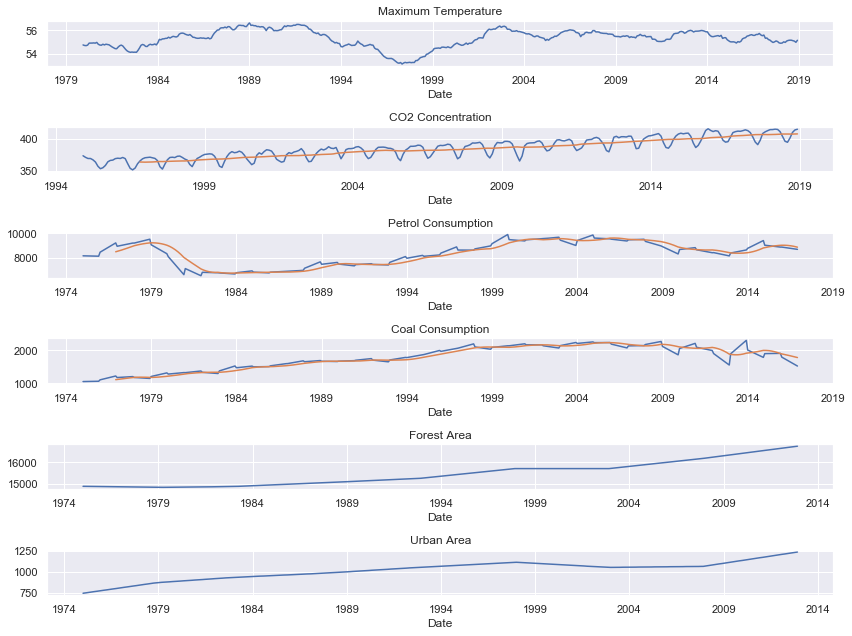

In [882]:
plt.subplot(6,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(6,1,2)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(6,1,3)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(6,1,4)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(6,1,5)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(6,1,6)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area doesn't seem to have an effect on temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

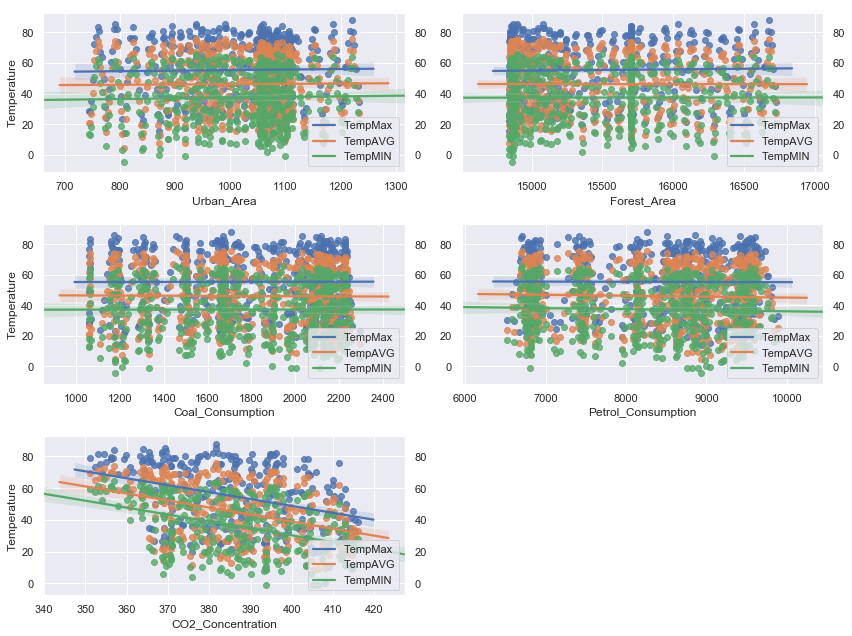

In [883]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

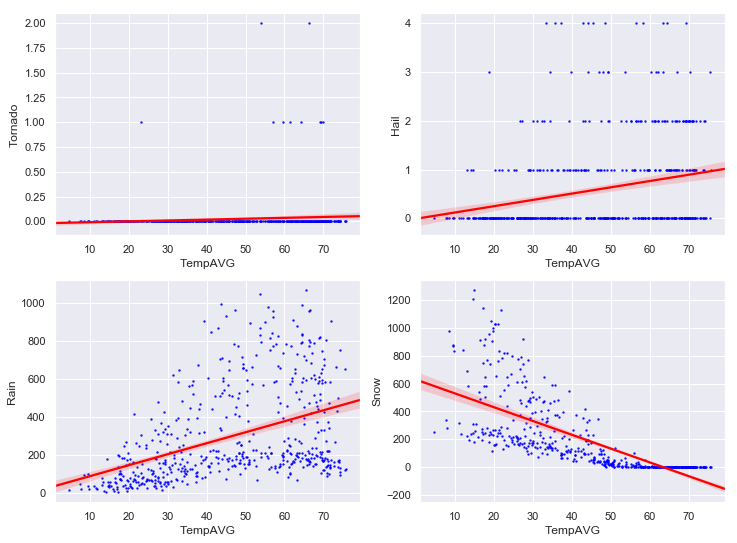

In [884]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data_State,y='Tornado',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data_State,y='Hail',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data_State,y='Rain',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data_State,y='Snow',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

In [885]:
alpha = 0.05
num_iterations=10000

def draw_bs_samples(data,func,size,iterations):
    return [func(np.random.choice(data,replace=True,size=size)) for i in range(iterations)]
         

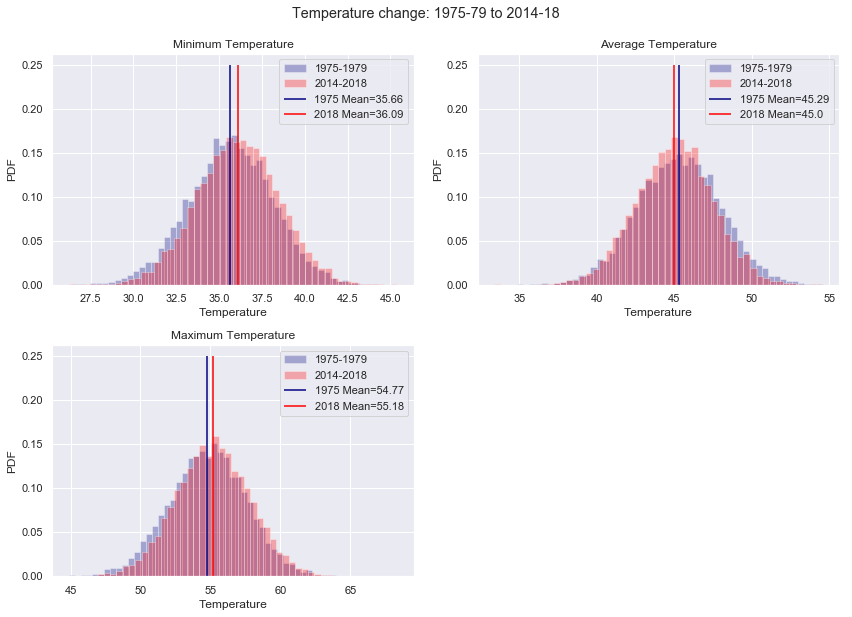

Hypothesis t-test:

Minimum Temperature:
p-value = 0.0
    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.

On average, 5 year mean MIN temperature in WI between 1975-79 and 2014-18 changed around 0.43F

Average Temperature:
p-value = 0.0
    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.

On average, 5 year mean temperature in WI between 1975-79 and 2014-18 changed around -0.29F

Maximum Temperature:
p-value = 0.0
    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.

On average, 5 year mean MAX temperature in WI between 1975-79 and 2014-18 changed around 0.41F


In [886]:
Climate_Data_State_1975 = Climate_Data_State[(Climate_Data_State.index.year >= 1975) & (Climate_Data_State.index.year <= 1979)]
Climate_Data_State_2018 = Climate_Data_State[(Climate_Data_State.index.year >= 2014) & (Climate_Data_State.index.year <= 2018)]

bs_TempMin_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMIN,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMin_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMIN,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempAVG_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempAVG,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempAVG_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempAVG,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempMax_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMAX,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMax_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMAX,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

plt.subplot(2,2,1)
plt.hist(bs_TempMin_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMin_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMin_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMin_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMin_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMin_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Minimum Temperature')
plt.legend()

plt.subplot(2,2,2)
plt.hist(bs_TempAVG_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempAVG_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempAVG_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_1975),2)))
plt.vlines(np.mean(bs_TempAVG_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Average Temperature')
plt.legend()

plt.subplot(2,2,3)
plt.hist(bs_TempMax_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMax_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMax_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMax_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMax_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMax_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Maximum Temperature')
plt.legend()

plt.suptitle('Temperature change: 1975-79 to 2014-18')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

t_min, p_min = st.ttest_ind(bs_TempMin_data_state_1975, bs_TempMin_data_state_2018)
t_avg, p_avg = st.ttest_ind(bs_TempAVG_data_state_1975, bs_TempAVG_data_state_2018)
t_max, p_max = st.ttest_ind(bs_TempMax_data_state_1975, bs_TempMax_data_state_2018)

print('Hypothesis t-test:')
print('\nMinimum Temperature:')
print('p-value = ' + str(np.round(p_min,4)))
if p_min > alpha:
    print('    Fail to reject H0: The minimum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean minimum temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MIN temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMin_data_state_2018)-np.mean(bs_TempMin_data_state_1975),2)) + 'F')

print('\nAverage Temperature:')
print('p-value = ' + str(np.round(p_avg,4)))
if p_min > alpha:
    print('    Fail to reject H0: The average temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempAVG_data_state_2018)-np.mean(bs_TempAVG_data_state_1975),2)) + 'F')

print('\nMaximum Temperature:')
print('p-value = ' + str(np.round(p_max,4)))
if p_min > alpha:
    print('    Fail to reject H0: The maximum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean max temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MAX temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMax_data_state_2018)-np.mean(bs_TempMax_data_state_1975),2)) + 'F')


## Central

### Colorado (CO)

In [887]:
Current_State = 'CO'

In [888]:
#Extract all data for CO
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [889]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for Colorado since 1975.

The chart shows fluctuations in the trend in Colorado temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures fluctuated over the years with an upward trend.

&#9757;

In [890]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State ,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years.

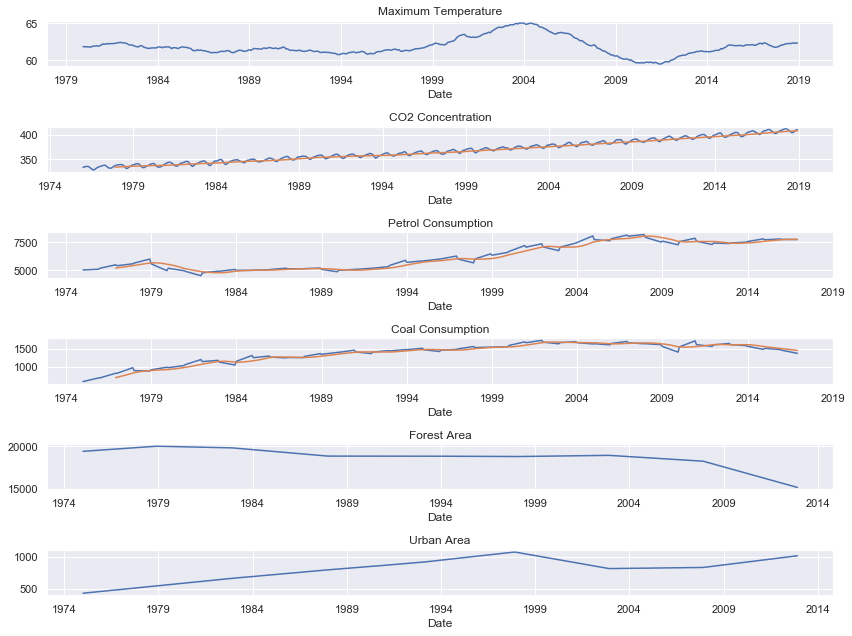

In [891]:
plt.subplot(6,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(6,1,2)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(6,1,3)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(6,1,4)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(6,1,5)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(6,1,6)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area doesn't seem to have an effect on temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

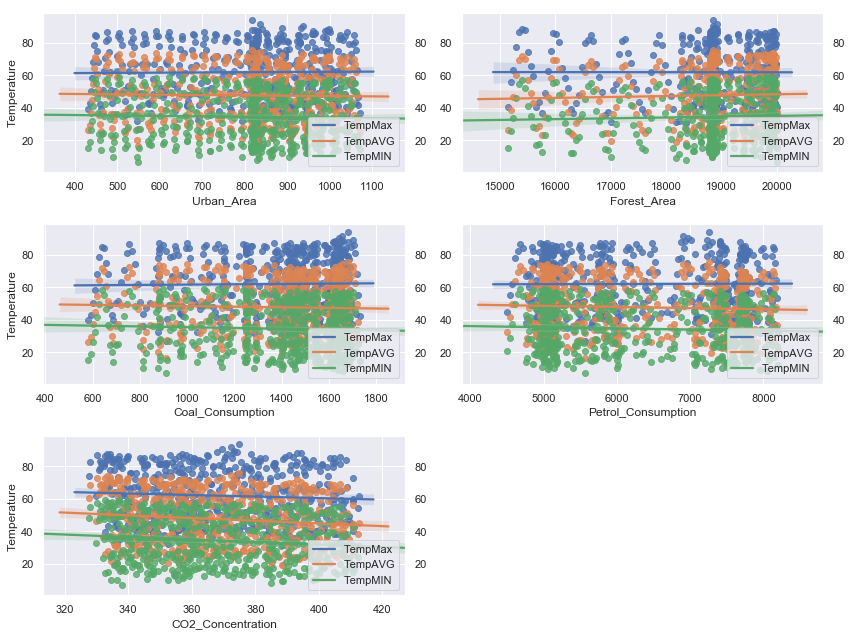

In [892]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

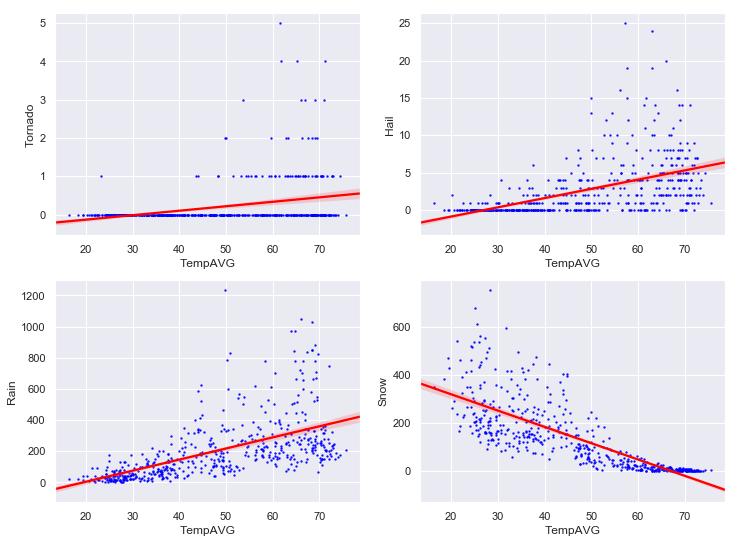

In [893]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data_State,y='Tornado',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data_State,y='Hail',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data_State,y='Rain',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data_State,y='Snow',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

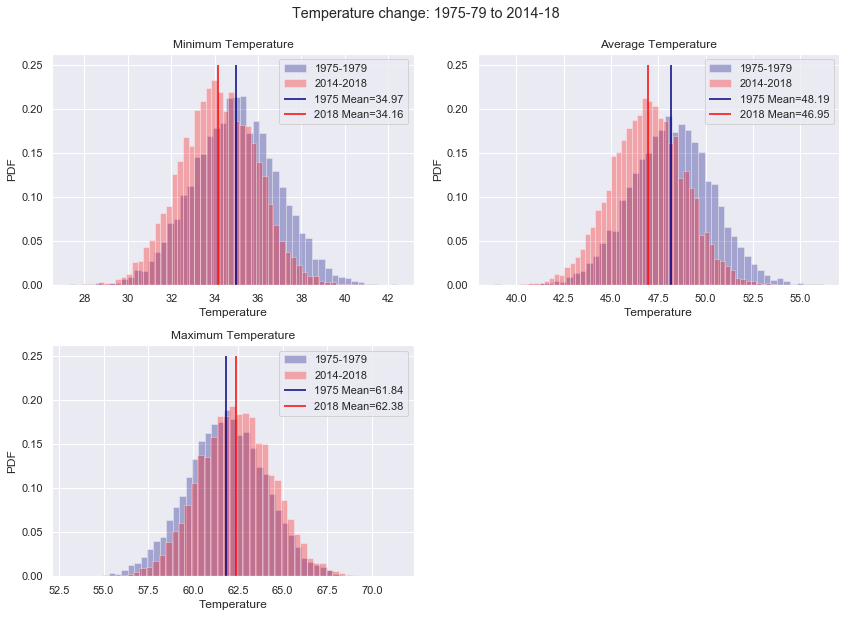

Hypothesis t-test:

Minimum Temperature:
p-value = 0.0
    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.

On average, 5 year mean MIN temperature in CO between 1975-79 and 2014-18 changed around -0.81F

Average Temperature:
p-value = 0.0
    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.

On average, 5 year mean temperature in CO between 1975-79 and 2014-18 changed around -1.24F

Maximum Temperature:
p-value = 0.0
    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.

On average, 5 year mean MAX temperature in CO between 1975-79 and 2014-18 changed around 0.54F


In [894]:
Climate_Data_State_1975 = Climate_Data_State[(Climate_Data_State.index.year >= 1975) & (Climate_Data_State.index.year <= 1979)]
Climate_Data_State_2018 = Climate_Data_State[(Climate_Data_State.index.year >= 2014) & (Climate_Data_State.index.year <= 2018)]

bs_TempMin_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMIN,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMin_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMIN,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempAVG_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempAVG,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempAVG_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempAVG,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempMax_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMAX,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMax_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMAX,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

plt.subplot(2,2,1)
plt.hist(bs_TempMin_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMin_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMin_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMin_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMin_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMin_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Minimum Temperature')
plt.legend()

plt.subplot(2,2,2)
plt.hist(bs_TempAVG_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempAVG_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempAVG_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_1975),2)))
plt.vlines(np.mean(bs_TempAVG_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Average Temperature')
plt.legend()

plt.subplot(2,2,3)
plt.hist(bs_TempMax_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMax_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMax_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMax_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMax_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMax_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Maximum Temperature')
plt.legend()

plt.suptitle('Temperature change: 1975-79 to 2014-18')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

t_min, p_min = st.ttest_ind(bs_TempMin_data_state_1975, bs_TempMin_data_state_2018)
t_avg, p_avg = st.ttest_ind(bs_TempAVG_data_state_1975, bs_TempAVG_data_state_2018)
t_max, p_max = st.ttest_ind(bs_TempMax_data_state_1975, bs_TempMax_data_state_2018)

print('Hypothesis t-test:')
print('\nMinimum Temperature:')
print('p-value = ' + str(np.round(p_min,4)))
if p_min > alpha:
    print('    Fail to reject H0: The minimum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean minimum temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MIN temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMin_data_state_2018)-np.mean(bs_TempMin_data_state_1975),2)) + 'F')

print('\nAverage Temperature:')
print('p-value = ' + str(np.round(p_avg,4)))
if p_min > alpha:
    print('    Fail to reject H0: The average temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempAVG_data_state_2018)-np.mean(bs_TempAVG_data_state_1975),2)) + 'F')

print('\nMaximum Temperature:')
print('p-value = ' + str(np.round(p_max,4)))
if p_min > alpha:
    print('    Fail to reject H0: The maximum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean max temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MAX temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMax_data_state_2018)-np.mean(bs_TempMax_data_state_1975),2)) + 'F')


## South

### Texas (TX)

In [895]:
Current_State = 'TX'

In [896]:
#Extract all data for TX
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [897]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for Texas since 1975.

The chart shows fluctuations in the trend in Texas temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures fluctuated over the years with an upward trend.

&#9757;

In [898]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State ,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years.

Texas shows an increase in all the factors that lead to increase in temperature, which corresponded to drastic increase in maximum temperature over the years.

**Texas doesn't have CO2 Concentration data*

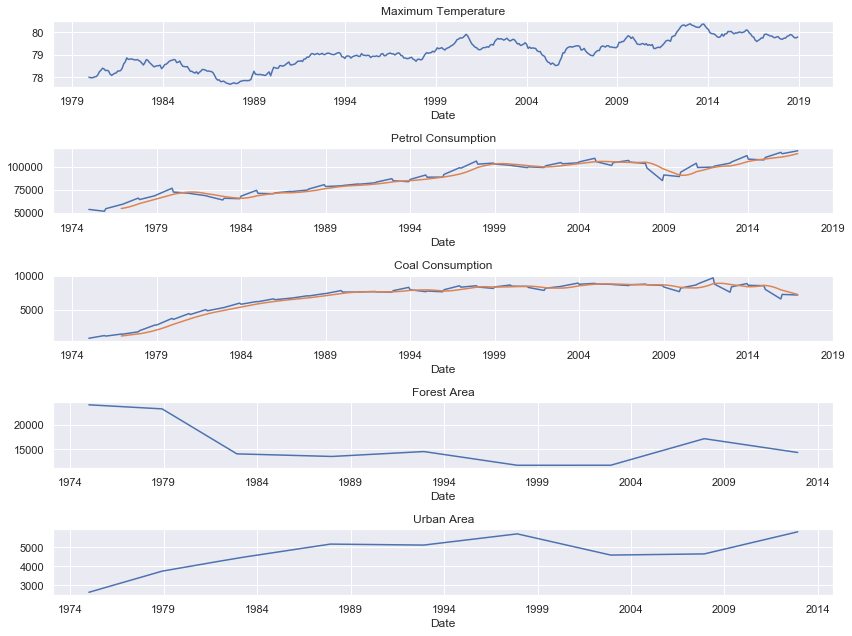

In [899]:
plt.subplot(5,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(5,1,2)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(5,1,3)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(5,1,4)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(5,1,5)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area show a decrease in temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>

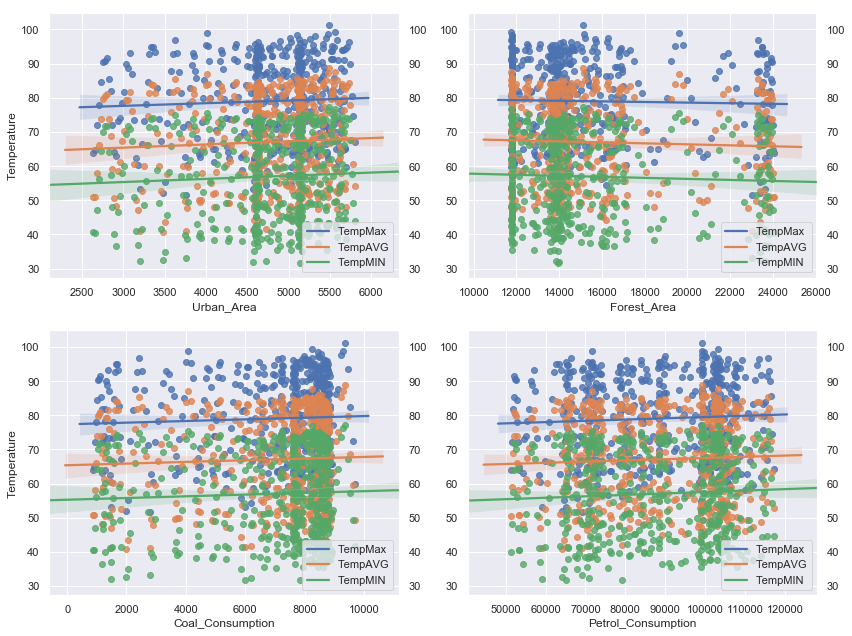

In [900]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

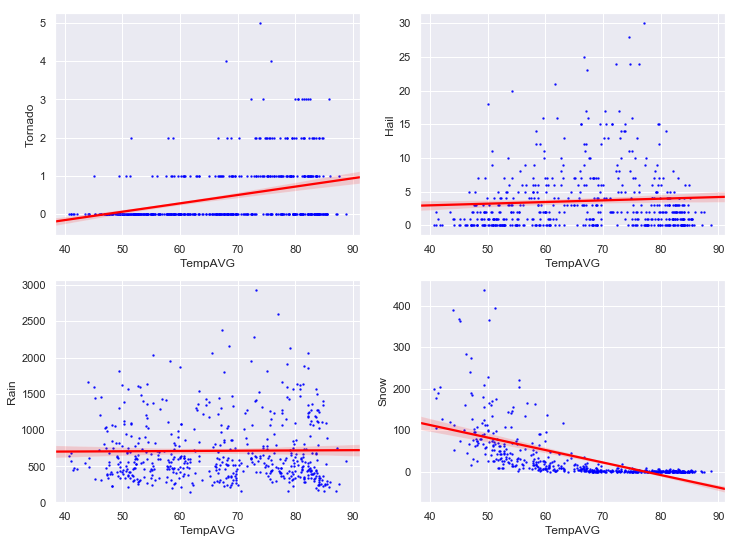

In [901]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data_State,y='Tornado',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data_State,y='Hail',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data_State,y='Rain',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data_State,y='Snow',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

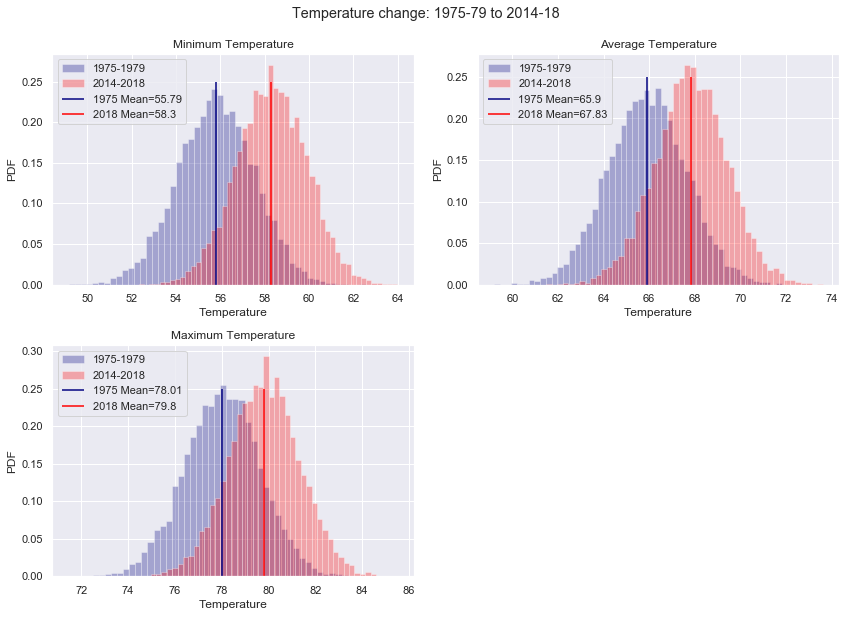

Hypothesis t-test:

Minimum Temperature:
p-value = 0.0
    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.

On average, 5 year mean MIN temperature in TX between 1975-79 and 2014-18 changed around 2.52F

Average Temperature:
p-value = 0.0
    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.

On average, 5 year mean temperature in TX between 1975-79 and 2014-18 changed around 1.93F

Maximum Temperature:
p-value = 0.0
    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.

On average, 5 year mean MAX temperature in TX between 1975-79 and 2014-18 changed around 1.8F


In [902]:
Climate_Data_State_1975 = Climate_Data_State[(Climate_Data_State.index.year >= 1975) & (Climate_Data_State.index.year <= 1979)]
Climate_Data_State_2018 = Climate_Data_State[(Climate_Data_State.index.year >= 2014) & (Climate_Data_State.index.year <= 2018)]

bs_TempMin_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMIN,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMin_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMIN,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempAVG_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempAVG,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempAVG_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempAVG,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempMax_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMAX,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMax_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMAX,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

plt.subplot(2,2,1)
plt.hist(bs_TempMin_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMin_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMin_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMin_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMin_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMin_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Minimum Temperature')
plt.legend()

plt.subplot(2,2,2)
plt.hist(bs_TempAVG_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempAVG_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempAVG_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_1975),2)))
plt.vlines(np.mean(bs_TempAVG_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Average Temperature')
plt.legend()

plt.subplot(2,2,3)
plt.hist(bs_TempMax_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMax_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMax_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMax_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMax_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMax_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Maximum Temperature')
plt.legend()

plt.suptitle('Temperature change: 1975-79 to 2014-18')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

t_min, p_min = st.ttest_ind(bs_TempMin_data_state_1975, bs_TempMin_data_state_2018)
t_avg, p_avg = st.ttest_ind(bs_TempAVG_data_state_1975, bs_TempAVG_data_state_2018)
t_max, p_max = st.ttest_ind(bs_TempMax_data_state_1975, bs_TempMax_data_state_2018)

print('Hypothesis t-test:')
print('\nMinimum Temperature:')
print('p-value = ' + str(np.round(p_min,4)))
if p_min > alpha:
    print('    Fail to reject H0: The minimum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean minimum temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MIN temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMin_data_state_2018)-np.mean(bs_TempMin_data_state_1975),2)) + 'F')

print('\nAverage Temperature:')
print('p-value = ' + str(np.round(p_avg,4)))
if p_min > alpha:
    print('    Fail to reject H0: The average temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempAVG_data_state_2018)-np.mean(bs_TempAVG_data_state_1975),2)) + 'F')

print('\nMaximum Temperature:')
print('p-value = ' + str(np.round(p_max,4)))
if p_min > alpha:
    print('    Fail to reject H0: The maximum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean max temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MAX temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMax_data_state_2018)-np.mean(bs_TempMax_data_state_1975),2)) + 'F')


### Hawaii (HI)

In [903]:
Current_State = 'HI'

In [904]:
#Extract all data for HI
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [905]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for Hawaii since 1975.

The chart shows fluctuations in the trend in Hawaii temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures fluctuated over the years with varying trend.

&#9757;

In [906]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State ,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years.

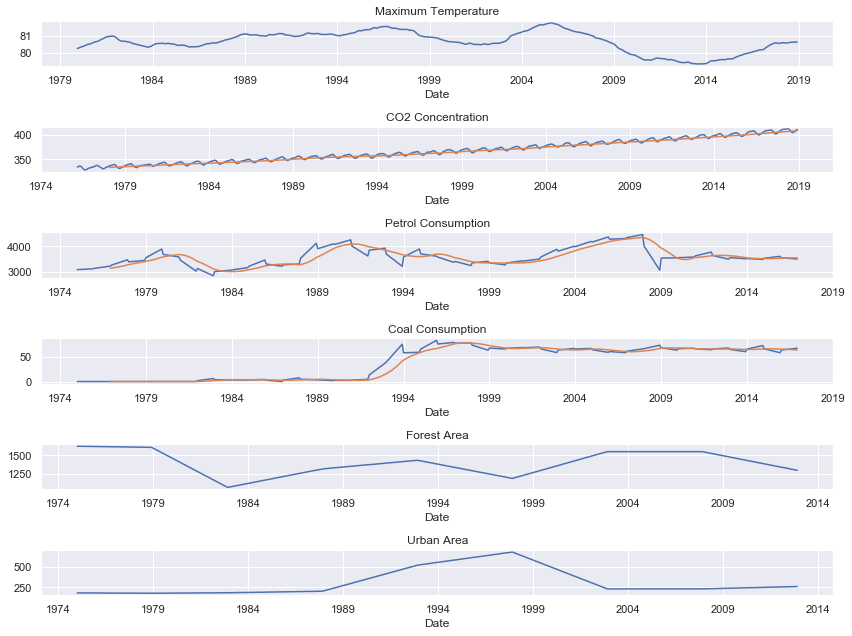

In [907]:
plt.subplot(6,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(6,1,2)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(6,1,3)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(6,1,4)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(6,1,5)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(6,1,6)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area doesn't seem to have an effect on temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

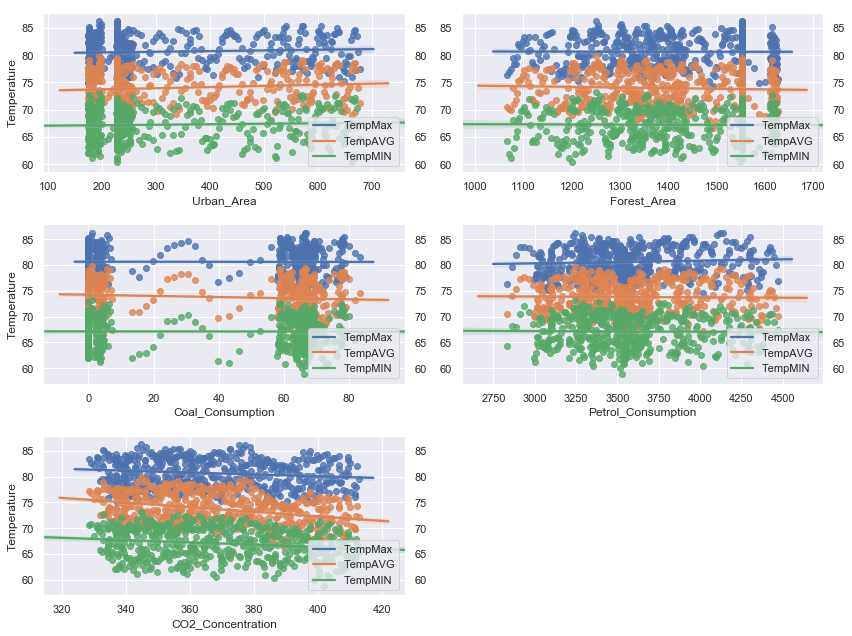

In [908]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** In case of Hawaii, raise in temperature seem to decrease torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Same goes with the rain, raise in temperature seem to decrease rainfall.<br>
**Snow:** On contrary, eaise in temperature corresponds to increase in snow days in Hawaii.

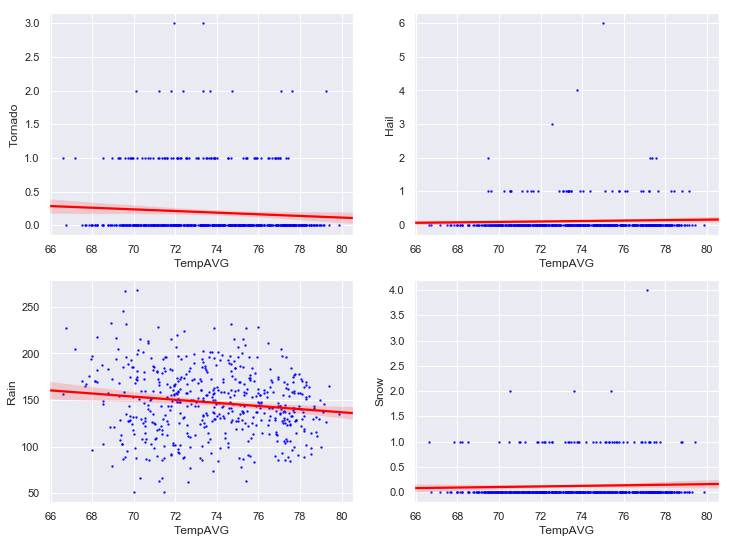

In [909]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data_State,y='Tornado',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data_State,y='Hail',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data_State,y='Rain',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data_State,y='Snow',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

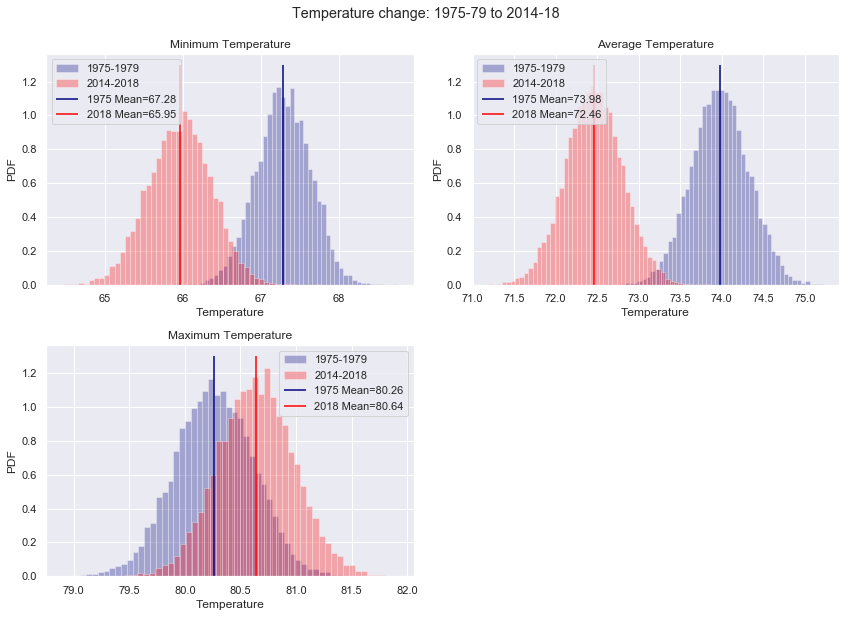

Hypothesis t-test:

Minimum Temperature:
p-value = 0.0
    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.

On average, 5 year mean MIN temperature in HI between 1975-79 and 2014-18 changed around -1.33F

Average Temperature:
p-value = 0.0
    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.

On average, 5 year mean temperature in HI between 1975-79 and 2014-18 changed around -1.52F

Maximum Temperature:
p-value = 0.0
    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.

On average, 5 year mean MAX temperature in HI between 1975-79 and 2014-18 changed around 0.38F


In [910]:
Climate_Data_State_1975 = Climate_Data_State[(Climate_Data_State.index.year >= 1975) & (Climate_Data_State.index.year <= 1979)]
Climate_Data_State_2018 = Climate_Data_State[(Climate_Data_State.index.year >= 2014) & (Climate_Data_State.index.year <= 2018)]

bs_TempMin_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMIN,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMin_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMIN,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempAVG_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempAVG,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempAVG_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempAVG,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempMax_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMAX,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMax_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMAX,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

plt.subplot(2,2,1)
plt.hist(bs_TempMin_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMin_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMin_data_state_1975),ymin=0,ymax=1.3,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMin_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMin_data_state_2018),ymin=0,ymax=1.3,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMin_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Minimum Temperature')
plt.legend()

plt.subplot(2,2,2)
plt.hist(bs_TempAVG_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempAVG_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempAVG_data_state_1975),ymin=0,ymax=1.3,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_1975),2)))
plt.vlines(np.mean(bs_TempAVG_data_state_2018),ymin=0,ymax=1.3,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Average Temperature')
plt.legend()

plt.subplot(2,2,3)
plt.hist(bs_TempMax_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMax_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMax_data_state_1975),ymin=0,ymax=1.3,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMax_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMax_data_state_2018),ymin=0,ymax=1.3,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMax_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Maximum Temperature')
plt.legend()

plt.suptitle('Temperature change: 1975-79 to 2014-18')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

t_min, p_min = st.ttest_ind(bs_TempMin_data_state_1975, bs_TempMin_data_state_2018)
t_avg, p_avg = st.ttest_ind(bs_TempAVG_data_state_1975, bs_TempAVG_data_state_2018)
t_max, p_max = st.ttest_ind(bs_TempMax_data_state_1975, bs_TempMax_data_state_2018)

print('Hypothesis t-test:')
print('\nMinimum Temperature:')
print('p-value = ' + str(np.round(p_min,4)))
if p_min > alpha:
    print('    Fail to reject H0: The minimum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean minimum temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MIN temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMin_data_state_2018)-np.mean(bs_TempMin_data_state_1975),2)) + 'F')

print('\nAverage Temperature:')
print('p-value = ' + str(np.round(p_avg,4)))
if p_min > alpha:
    print('    Fail to reject H0: The average temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempAVG_data_state_2018)-np.mean(bs_TempAVG_data_state_1975),2)) + 'F')

print('\nMaximum Temperature:')
print('p-value = ' + str(np.round(p_max,4)))
if p_min > alpha:
    print('    Fail to reject H0: The maximum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean max temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MAX temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMax_data_state_2018)-np.mean(bs_TempMax_data_state_1975),2)) + 'F')


## East
### Florida (FL)

In [911]:
Current_State = 'FL'

In [912]:
#Extract all data for FL
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [913]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for Florida since 1975.

The chart shows fluctuations in the trend in Florida temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures fluctuated over the years with an upward trend.

&#9757;

In [914]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State ,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years.

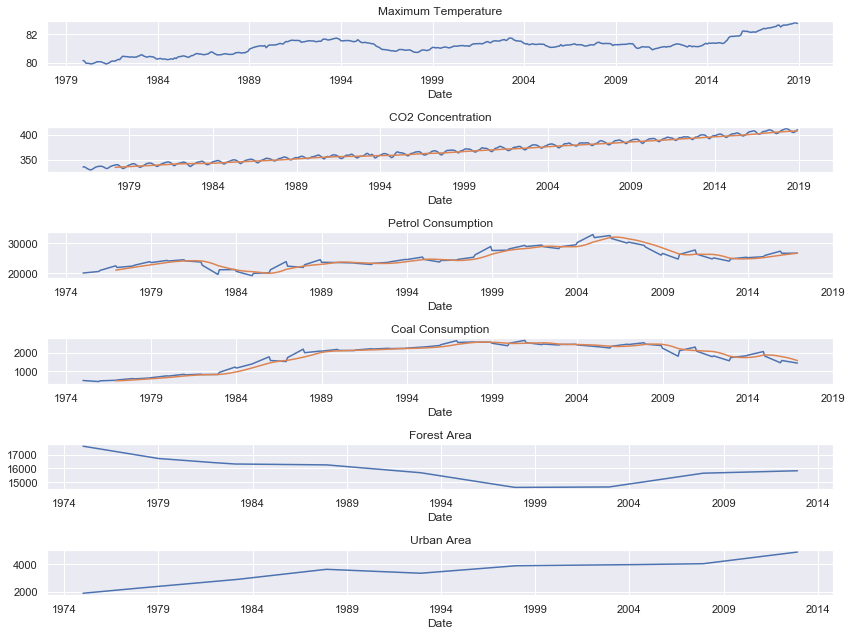

In [915]:
plt.subplot(6,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(6,1,2)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(6,1,3)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(6,1,4)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(6,1,5)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(6,1,6)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area doesn't seem to have an effect on temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

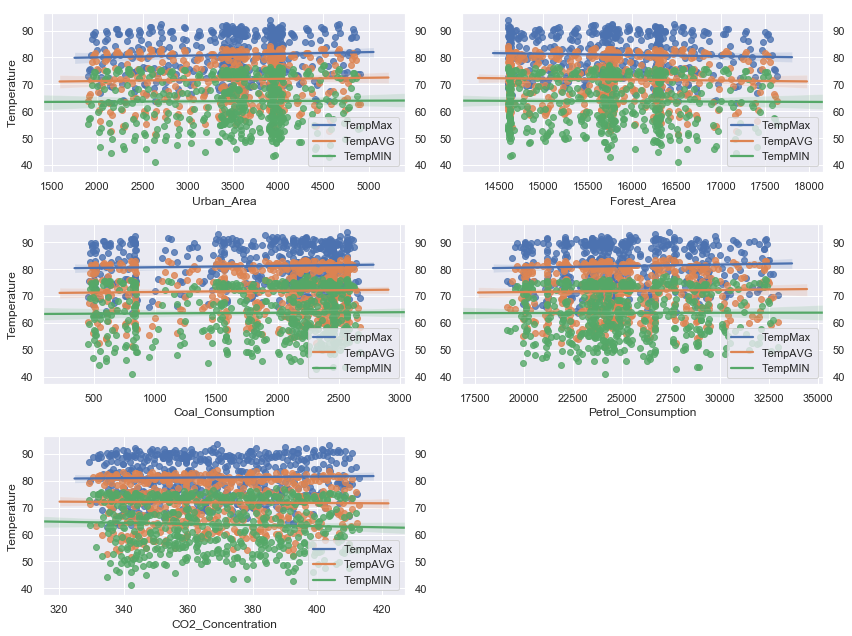

In [916]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

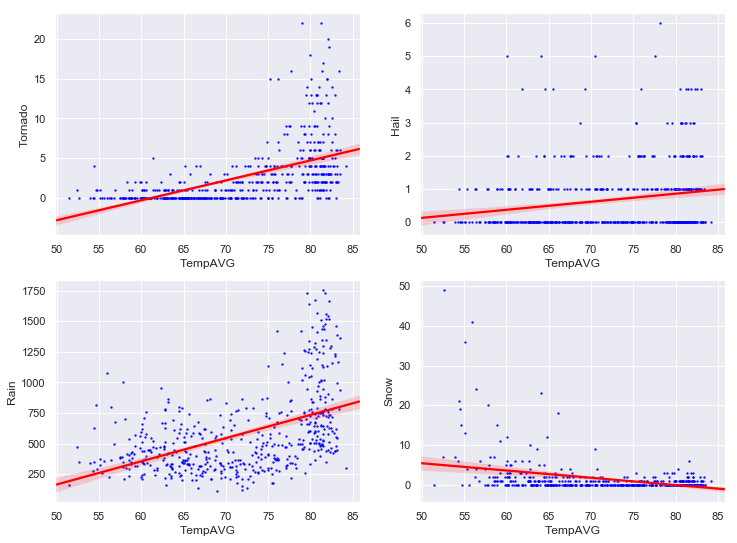

In [917]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data_State,y='Tornado',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data_State,y='Hail',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data_State,y='Rain',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data_State,y='Snow',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

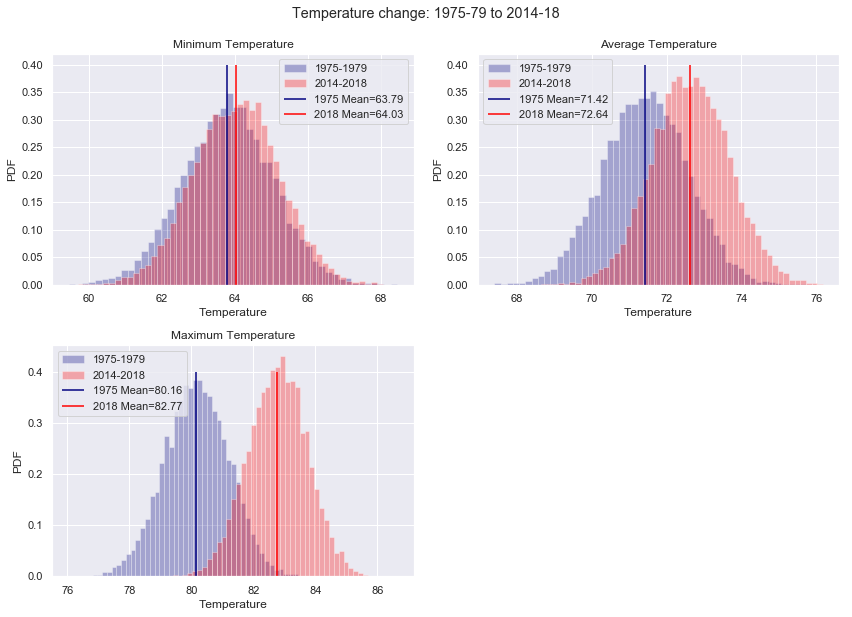

Hypothesis t-test:

Minimum Temperature:
p-value = 0.0
    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.

On average, 5 year mean MIN temperature in FL between 1975-79 and 2014-18 changed around 0.25F

Average Temperature:
p-value = 0.0
    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.

On average, 5 year mean temperature in FL between 1975-79 and 2014-18 changed around 1.21F

Maximum Temperature:
p-value = 0.0
    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.

On average, 5 year mean MAX temperature in FL between 1975-79 and 2014-18 changed around 2.61F


In [918]:
Climate_Data_State_1975 = Climate_Data_State[(Climate_Data_State.index.year >= 1975) & (Climate_Data_State.index.year <= 1979)]
Climate_Data_State_2018 = Climate_Data_State[(Climate_Data_State.index.year >= 2014) & (Climate_Data_State.index.year <= 2018)]

bs_TempMin_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMIN,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMin_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMIN,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempAVG_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempAVG,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempAVG_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempAVG,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempMax_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMAX,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMax_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMAX,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

plt.subplot(2,2,1)
plt.hist(bs_TempMin_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMin_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMin_data_state_1975),ymin=0,ymax=0.4,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMin_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMin_data_state_2018),ymin=0,ymax=0.4,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMin_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Minimum Temperature')
plt.legend()

plt.subplot(2,2,2)
plt.hist(bs_TempAVG_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempAVG_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempAVG_data_state_1975),ymin=0,ymax=0.4,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_1975),2)))
plt.vlines(np.mean(bs_TempAVG_data_state_2018),ymin=0,ymax=0.4,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Average Temperature')
plt.legend()

plt.subplot(2,2,3)
plt.hist(bs_TempMax_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMax_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMax_data_state_1975),ymin=0,ymax=0.4,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMax_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMax_data_state_2018),ymin=0,ymax=0.4,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMax_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Maximum Temperature')
plt.legend()

plt.suptitle('Temperature change: 1975-79 to 2014-18')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

t_min, p_min = st.ttest_ind(bs_TempMin_data_state_1975, bs_TempMin_data_state_2018)
t_avg, p_avg = st.ttest_ind(bs_TempAVG_data_state_1975, bs_TempAVG_data_state_2018)
t_max, p_max = st.ttest_ind(bs_TempMax_data_state_1975, bs_TempMax_data_state_2018)

print('Hypothesis t-test:')
print('\nMinimum Temperature:')
print('p-value = ' + str(np.round(p_min,4)))
if p_min > alpha:
    print('    Fail to reject H0: The minimum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean minimum temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MIN temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMin_data_state_2018)-np.mean(bs_TempMin_data_state_1975),2)) + 'F')

print('\nAverage Temperature:')
print('p-value = ' + str(np.round(p_avg,4)))
if p_min > alpha:
    print('    Fail to reject H0: The average temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempAVG_data_state_2018)-np.mean(bs_TempAVG_data_state_1975),2)) + 'F')

print('\nMaximum Temperature:')
print('p-value = ' + str(np.round(p_max,4)))
if p_min > alpha:
    print('    Fail to reject H0: The maximum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean max temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MAX temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMax_data_state_2018)-np.mean(bs_TempMax_data_state_1975),2)) + 'F')


## West
### California (CA)

In [919]:
Current_State = 'CA'

In [920]:
#Extract all data for CA
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [921]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for California since 1975.

The chart shows fluctuations in the trend in California temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures fluctuated over the years with an upward trend.

&#9757;

In [922]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State ,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years with an upward trend, and dangerously so in the recent years.

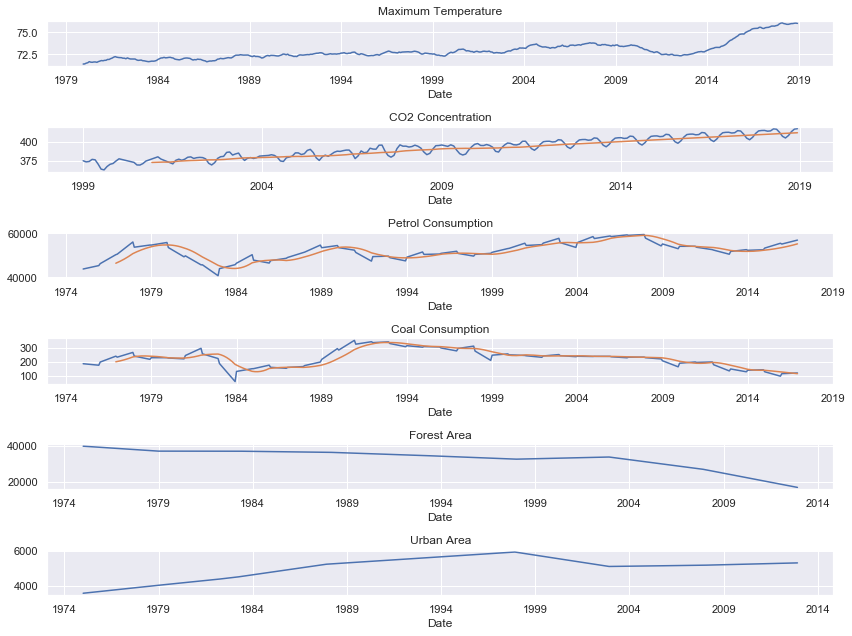

In [923]:
plt.subplot(6,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(6,1,2)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(6,1,3)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(6,1,4)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(6,1,5)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(6,1,6)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area doesn't seem to have an effect on temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

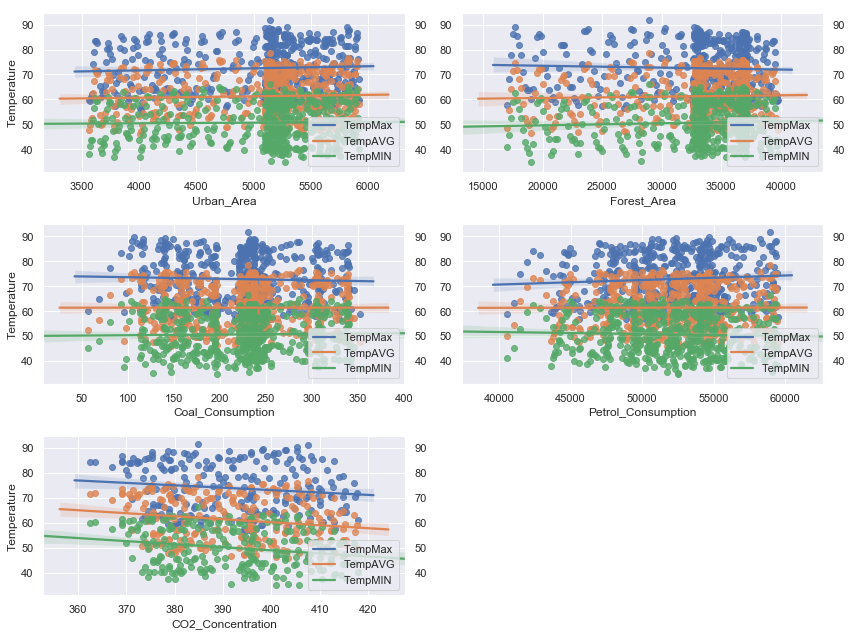

In [924]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
Interestingly in California, average raise in temperature corresponds to decrease in all natural event occurances including rain, which explains California's struggle with draught in the recent years

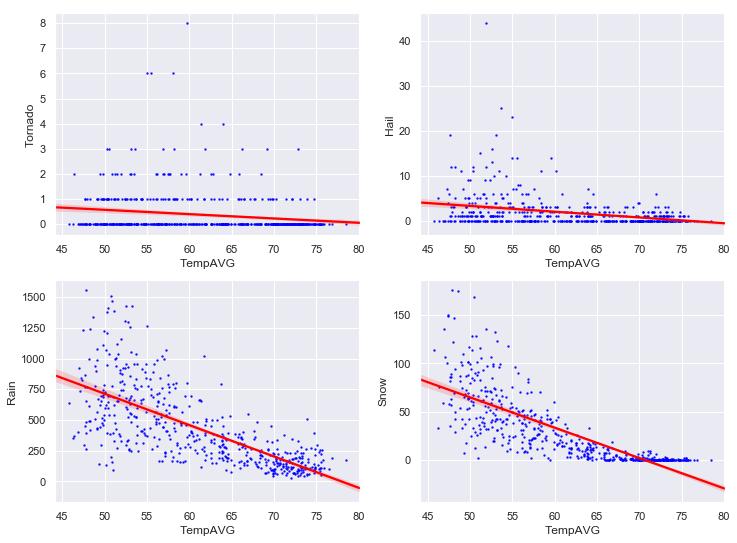

In [925]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data_State,y='Tornado',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data_State,y='Hail',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data_State,y='Rain',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data_State,y='Snow',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

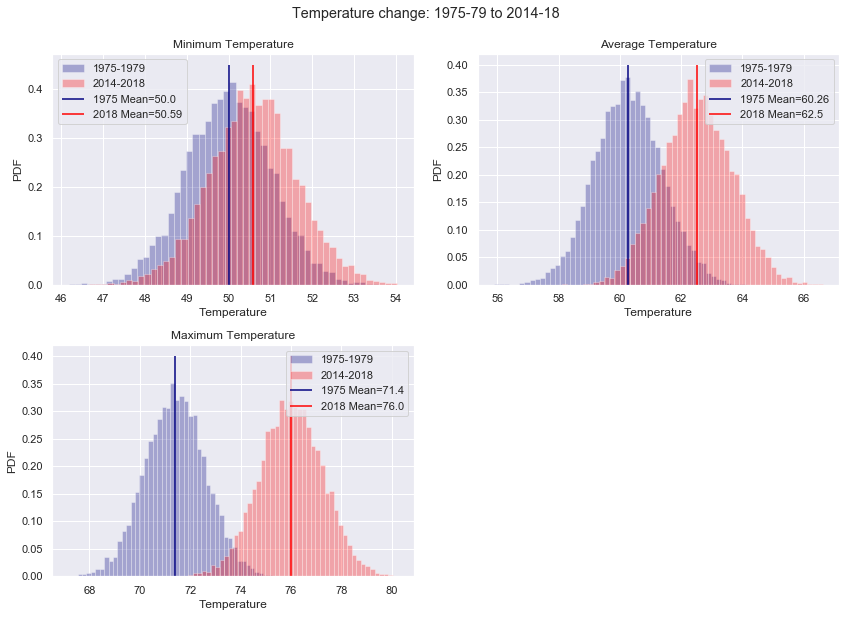

Hypothesis t-test:

Minimum Temperature:
p-value = 0.0
    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.

On average, 5 year mean MIN temperature in CA between 1975-79 and 2014-18 changed around 0.59F

Average Temperature:
p-value = 0.0
    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.

On average, 5 year mean temperature in CA between 1975-79 and 2014-18 changed around 2.24F

Maximum Temperature:
p-value = 0.0
    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.

On average, 5 year mean MAX temperature in CA between 1975-79 and 2014-18 changed around 4.6F


In [926]:
Climate_Data_State_1975 = Climate_Data_State[(Climate_Data_State.index.year >= 1975) & (Climate_Data_State.index.year <= 1979)]
Climate_Data_State_2018 = Climate_Data_State[(Climate_Data_State.index.year >= 2014) & (Climate_Data_State.index.year <= 2018)]

bs_TempMin_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMIN,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMin_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMIN,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempAVG_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempAVG,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempAVG_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempAVG,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempMax_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMAX,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMax_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMAX,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

plt.subplot(2,2,1)
plt.hist(bs_TempMin_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMin_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMin_data_state_1975),ymin=0,ymax=0.45,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMin_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMin_data_state_2018),ymin=0,ymax=0.45,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMin_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Minimum Temperature')
plt.legend()

plt.subplot(2,2,2)
plt.hist(bs_TempAVG_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempAVG_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempAVG_data_state_1975),ymin=0,ymax=0.4,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_1975),2)))
plt.vlines(np.mean(bs_TempAVG_data_state_2018),ymin=0,ymax=0.4,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Average Temperature')
plt.legend()

plt.subplot(2,2,3)
plt.hist(bs_TempMax_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMax_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMax_data_state_1975),ymin=0,ymax=0.4,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMax_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMax_data_state_2018),ymin=0,ymax=0.4,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMax_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Maximum Temperature')
plt.legend()

plt.suptitle('Temperature change: 1975-79 to 2014-18')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

t_min, p_min = st.ttest_ind(bs_TempMin_data_state_1975, bs_TempMin_data_state_2018)
t_avg, p_avg = st.ttest_ind(bs_TempAVG_data_state_1975, bs_TempAVG_data_state_2018)
t_max, p_max = st.ttest_ind(bs_TempMax_data_state_1975, bs_TempMax_data_state_2018)

print('Hypothesis t-test:')
print('\nMinimum Temperature:')
print('p-value = ' + str(np.round(p_min,4)))
if p_min > alpha:
    print('    Fail to reject H0: The minimum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean minimum temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MIN temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMin_data_state_2018)-np.mean(bs_TempMin_data_state_1975),2)) + 'F')

print('\nAverage Temperature:')
print('p-value = ' + str(np.round(p_avg,4)))
if p_min > alpha:
    print('    Fail to reject H0: The average temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempAVG_data_state_2018)-np.mean(bs_TempAVG_data_state_1975),2)) + 'F')

print('\nMaximum Temperature:')
print('p-value = ' + str(np.round(p_max,4)))
if p_min > alpha:
    print('    Fail to reject H0: The maximum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean max temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MAX temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMax_data_state_2018)-np.mean(bs_TempMax_data_state_1975),2)) + 'F')


# Insights
## Alaska (AK)

In [927]:
Current_State = 'AK'

In [928]:
#Extract all data for AK
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [929]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

### Insight
I chose to present Alaska because the recent trends in the ice capped state are alarming and present significant danger to the ecosystems within the state and also around the world due to its potential to raise sealevel.

#### Temperature Trend

The chart below shows temperature trend for Alaska since 1975.

The chart shows fluctuations in the trend in Alaska temperatures. Temperature in Alaska has been on a dangerous upward trend due to many factors - mostly human - over the past years.

&#9757;

In [930]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State ,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years with an upward trend, and dangerously so in the recent years.

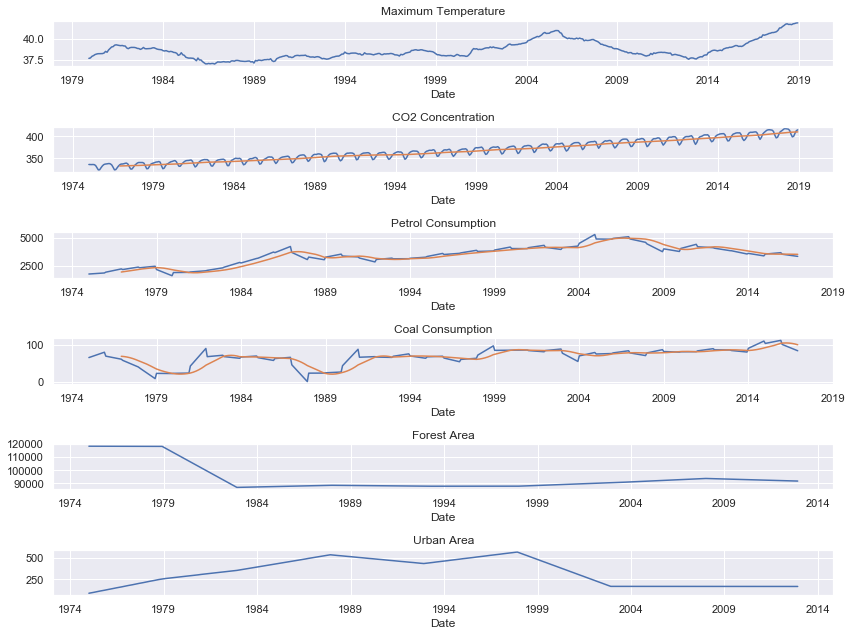

In [931]:
plt.subplot(6,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(6,1,2)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(6,1,3)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(6,1,4)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(6,1,5)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(6,1,6)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area doesn't seem to have an effect on temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

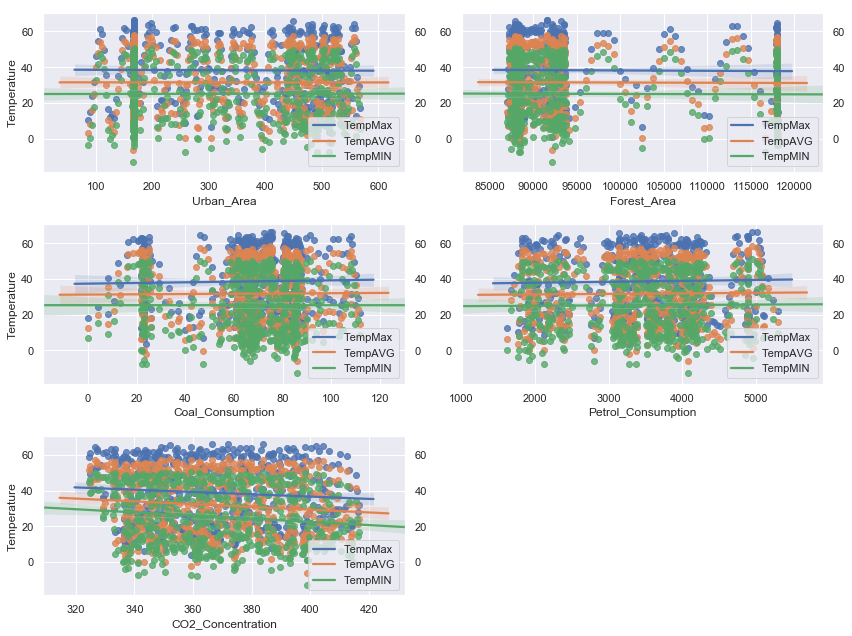

In [932]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

The melting ice and increase in rainfall in Alaska as temperatures raise pose a threat to many coastal cities around the world in the next decades.

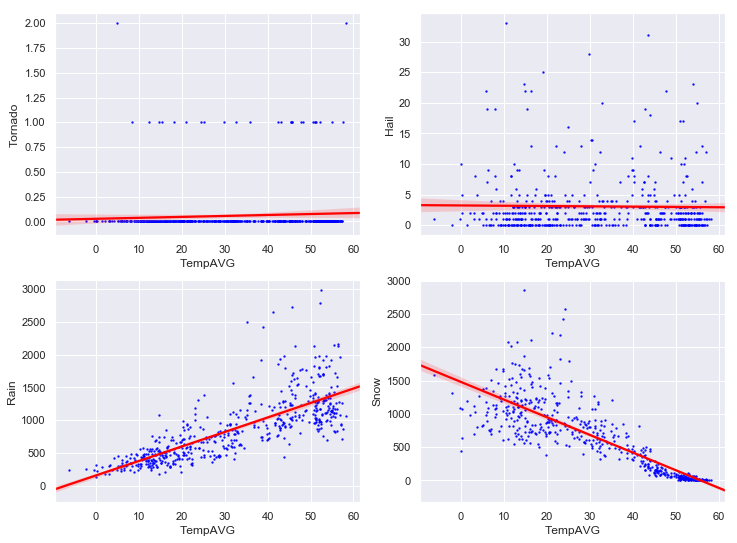

In [933]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data_State,y='Tornado',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data_State,y='Hail',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data_State,y='Rain',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data_State,y='Snow',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

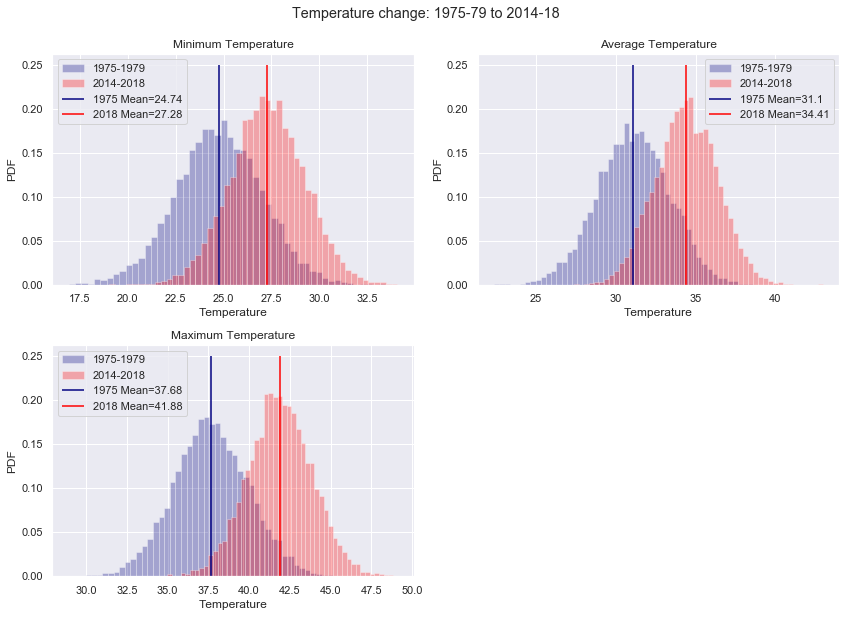

Hypothesis t-test:

Minimum Temperature:
p-value = 0.0
    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.

On average, 5 year mean MIN temperature in AK between 1975-79 and 2014-18 changed around 2.54F

Average Temperature:
p-value = 0.0
    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.

On average, 5 year mean temperature in AK between 1975-79 and 2014-18 changed around 3.31F

Maximum Temperature:
p-value = 0.0
    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.

On average, 5 year mean MAX temperature in AK between 1975-79 and 2014-18 changed around 4.21F


In [934]:
Climate_Data_State_1975 = Climate_Data_State[(Climate_Data_State.index.year >= 1975) & (Climate_Data_State.index.year <= 1979)]
Climate_Data_State_2018 = Climate_Data_State[(Climate_Data_State.index.year >= 2014) & (Climate_Data_State.index.year <= 2018)]

bs_TempMin_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMIN,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMin_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMIN,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempAVG_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempAVG,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempAVG_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempAVG,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

bs_TempMax_data_state_1975 = draw_bs_samples(Climate_Data_State_1975.TempMAX,np.mean,size=len(Climate_Data_State_1975),iterations=num_iterations)
bs_TempMax_data_state_2018 = draw_bs_samples(Climate_Data_State_2018.TempMAX,np.mean,size=len(Climate_Data_State_2018),iterations=num_iterations)

plt.subplot(2,2,1)
plt.hist(bs_TempMin_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMin_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMin_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMin_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMin_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMin_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Minimum Temperature')
plt.legend()

plt.subplot(2,2,2)
plt.hist(bs_TempAVG_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempAVG_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempAVG_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_1975),2)))
plt.vlines(np.mean(bs_TempAVG_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempAVG_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Average Temperature')
plt.legend()

plt.subplot(2,2,3)
plt.hist(bs_TempMax_data_state_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMax_data_state_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMax_data_state_1975),ymin=0,ymax=0.25,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMax_data_state_1975),2)))
plt.vlines(np.mean(bs_TempMax_data_state_2018),ymin=0,ymax=0.25,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMax_data_state_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Maximum Temperature')
plt.legend()

plt.suptitle('Temperature change: 1975-79 to 2014-18')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

t_min, p_min = st.ttest_ind(bs_TempMin_data_state_1975, bs_TempMin_data_state_2018)
t_avg, p_avg = st.ttest_ind(bs_TempAVG_data_state_1975, bs_TempAVG_data_state_2018)
t_max, p_max = st.ttest_ind(bs_TempMax_data_state_1975, bs_TempMax_data_state_2018)

print('Hypothesis t-test:')
print('\nMinimum Temperature:')
print('p-value = ' + str(np.round(p_min,4)))
if p_min > alpha:
    print('    Fail to reject H0: The minimum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean minimum temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MIN temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMin_data_state_2018)-np.mean(bs_TempMin_data_state_1975),2)) + 'F')

print('\nAverage Temperature:')
print('p-value = ' + str(np.round(p_avg,4)))
if p_min > alpha:
    print('    Fail to reject H0: The average temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempAVG_data_state_2018)-np.mean(bs_TempAVG_data_state_1975),2)) + 'F')

print('\nMaximum Temperature:')
print('p-value = ' + str(np.round(p_max,4)))
if p_min > alpha:
    print('    Fail to reject H0: The maximum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean max temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MAX temperature in '+ Current_State +' between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMax_data_state_2018)-np.mean(bs_TempMax_data_state_1975),2)) + 'F')


## Overall USA

### Insight


#### Temperature Trend

The chart below developed on Tableau presents an interactive platform for you to explore the climate change by state over the recent years.

&#9757;

In [935]:
HTML('''<div class='tableauPlaceholder' id='viz1548265620435' style='position: relative'>
            <noscript>
                <a href='#'>
                    <img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cl&#47;ClimateChangeAnalysis&#47;TemperatureTrend_1&#47;1_rss.png' style='border: none' />
                </a>
            </noscript>
            <object class='tableauViz'  style='display:none;'>
                <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
                <param name='embed_code_version' value='3' />
                <param name='site_root' value='' />
                <param name='name' value='ClimateChangeAnalysis&#47;TemperatureTrend_1' />
                <param name='tabs' value='yes' />
                <param name='toolbar' value='yes' />
                <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cl&#47;ClimateChangeAnalysis&#47;TemperatureTrend_1&#47;1.png' /> 
                <param name='animate_transition' value='yes' />
                <param name='display_static_image' value='yes' />
                <param name='display_spinner' value='yes' />
                <param name='display_overlay' value='yes' />
                <param name='display_count' value='yes' />
            </object>
        </div>                
        <script type='text/javascript'>
            var divElement = document.getElementById('viz1548265620435');
            var vizElement = divElement.getElementsByTagName('object')[0];
            vizElement.style.minWidth='420px';
            vizElement.style.maxWidth='1550px';
            vizElement.style.width='100%';
            vizElement.style.minHeight='610px';
            vizElement.style.maxHeight='910px';
            vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
            var scriptElement = document.createElement('script');
            scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
            vizElement.parentNode.insertBefore(scriptElement, vizElement);
        </script>''')

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years with an upward trend, and dangerously so in the recent years.

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area has a profound impact in decreasing the tempeatures. Scientific reason we should plant more trees!<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

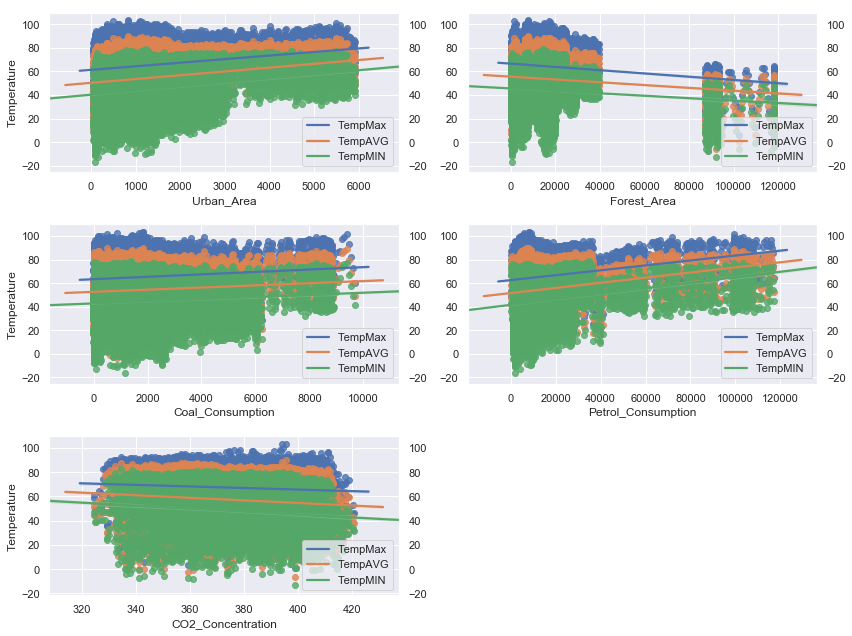

In [936]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

The melting ice and increase in rainfall in Alaska as temperatures raise pose a threat to many coastal cities around the world in the next decades.

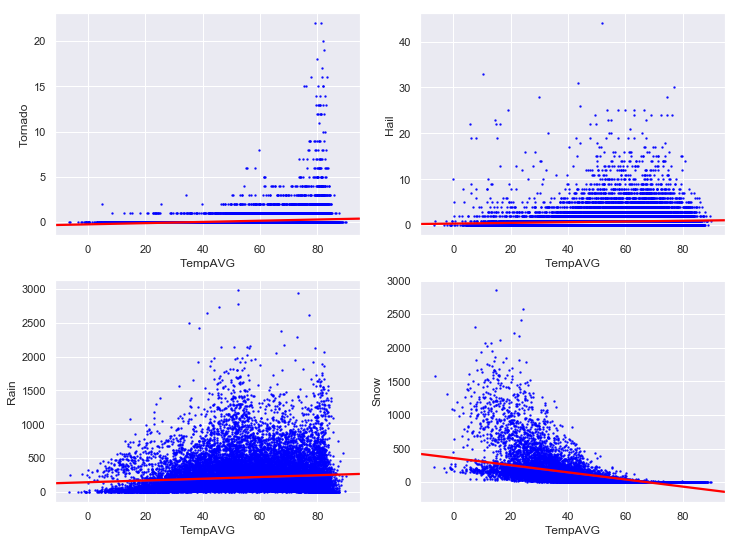

In [937]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data,y='Tornado',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data,y='Hail',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data,y='Rain',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data,y='Snow',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

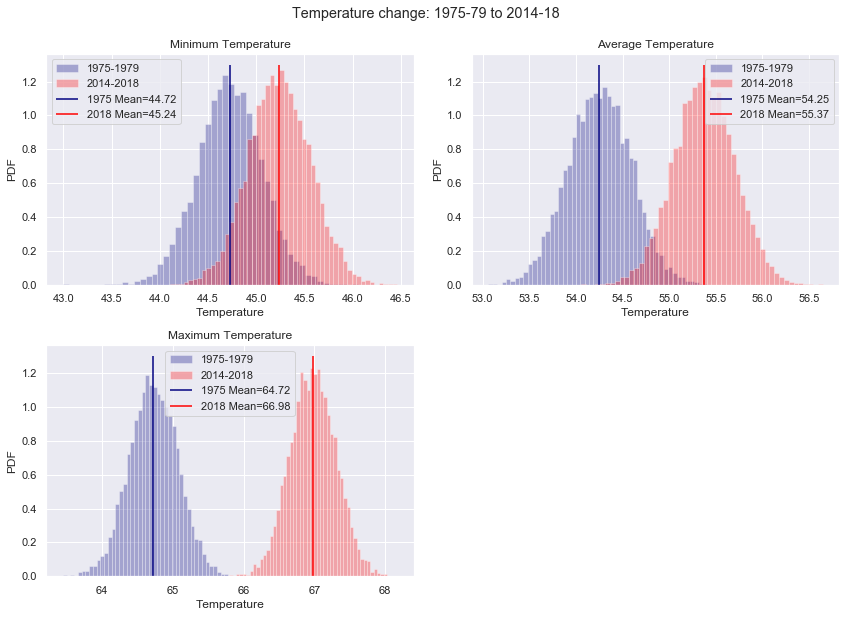

Hypothesis t-test:

Minimum Temperature:
p-value = 0.0
    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.

On average, 5 year mean MIN temperature in USA between 1975-79 and 2014-18 changed around 2.54F

Average Temperature:
p-value = 0.0
    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.

On average, 5 year mean temperature in USA between 1975-79 and 2014-18 changed around 3.31F

Maximum Temperature:
p-value = 0.0
    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.

On average, 5 year mean MAX temperature in USA between 1975-79 and 2014-18 changed around 4.21F


In [938]:
Climate_Data_1975 = Climate_Data[(Climate_Data.index.get_level_values('Date').year >= 1975) & (Climate_Data.index.get_level_values('Date').year <= 1979)]
Climate_Data_2018 = Climate_Data[(Climate_Data.index.get_level_values('Date').year >= 2014) & (Climate_Data.index.get_level_values('Date').year <= 2018)]

bs_TempMin_data_1975 = draw_bs_samples(Climate_Data_1975.TempMIN,np.mean,size=len(Climate_Data_1975),iterations=num_iterations)
bs_TempMin_data_2018 = draw_bs_samples(Climate_Data_2018.TempMIN,np.mean,size=len(Climate_Data_2018),iterations=num_iterations)

bs_TempAVG_data_1975 = draw_bs_samples(Climate_Data_1975.TempAVG,np.mean,size=len(Climate_Data_1975),iterations=num_iterations)
bs_TempAVG_data_2018 = draw_bs_samples(Climate_Data_2018.TempAVG,np.mean,size=len(Climate_Data_2018),iterations=num_iterations)

bs_TempMax_data_1975 = draw_bs_samples(Climate_Data_1975.TempMAX,np.mean,size=len(Climate_Data_1975),iterations=num_iterations)
bs_TempMax_data_2018 = draw_bs_samples(Climate_Data_2018.TempMAX,np.mean,size=len(Climate_Data_2018),iterations=num_iterations)

plt.subplot(2,2,1)
plt.hist(bs_TempMin_data_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMin_data_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMin_data_1975),ymin=0,ymax=1.3,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMin_data_1975),2)))
plt.vlines(np.mean(bs_TempMin_data_2018),ymin=0,ymax=1.3,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMin_data_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Minimum Temperature')
plt.legend()

plt.subplot(2,2,2)
plt.hist(bs_TempAVG_data_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempAVG_data_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempAVG_data_1975),ymin=0,ymax=1.3,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempAVG_data_1975),2)))
plt.vlines(np.mean(bs_TempAVG_data_2018),ymin=0,ymax=1.3,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempAVG_data_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Average Temperature')
plt.legend()

plt.subplot(2,2,3)
plt.hist(bs_TempMax_data_1975,bins=50,density=1,label='1975-1979',alpha=0.3, color='navy')
plt.hist(bs_TempMax_data_2018,bins=50,density=1,label='2014-2018',alpha=0.3, color='red')
plt.vlines(np.mean(bs_TempMax_data_1975),ymin=0,ymax=1.3,color='navy',label='1975 Mean='+str(np.round(np.mean(bs_TempMax_data_1975),2)))
plt.vlines(np.mean(bs_TempMax_data_2018),ymin=0,ymax=1.3,color='red',label='2018 Mean='+str(np.round(np.mean(bs_TempMax_data_2018),2)))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Maximum Temperature')
plt.legend()

plt.suptitle('Temperature change: 1975-79 to 2014-18')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

t_min, p_min = st.ttest_ind(bs_TempMin_data_1975, bs_TempMin_data_2018)
t_avg, p_avg = st.ttest_ind(bs_TempAVG_data_1975, bs_TempAVG_data_2018)
t_max, p_max = st.ttest_ind(bs_TempMax_data_1975, bs_TempMax_data_2018)

print('Hypothesis t-test:')
print('\nMinimum Temperature:')
print('p-value = ' + str(np.round(p_min,4)))
if p_min > alpha:
    print('    Fail to reject H0: The minimum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean minimum temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The minimum temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean minimum temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MIN temperature in USA between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMin_data_state_2018)-np.mean(bs_TempMin_data_state_1975),2)) + 'F')

print('\nAverage Temperature:')
print('p-value = ' + str(np.round(p_avg,4)))
if p_min > alpha:
    print('    Fail to reject H0: The average temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The average temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean temperature in USA between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempAVG_data_state_2018)-np.mean(bs_TempAVG_data_state_1975),2)) + 'F')

print('\nMaximum Temperature:')
print('p-value = ' + str(np.round(p_max,4)))
if p_min > alpha:
    print('    Fail to reject H0: The maximum temperature data between 1975-79 and 2014-18 is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests mean max temperature is not different between 1975 and 2018')
else:
    print('    Reject H0: The temperature data between 1975-79 and 2014-18 IS STATISTICALLY SIGNIFICANTLY DIFFERENT; Data suggests that mean max temperature is different between 1975 and 2018.')
    print('\nOn average, 5 year mean MAX temperature in USA between 1975-79 and 2014-18 changed around ' + str(np.round(np.mean(bs_TempMax_data_state_2018)-np.mean(bs_TempMax_data_state_1975),2)) + 'F')


# Conclusion

Through the visual exploration of data, we can conclude that human activity present as factors for climate change. Data from all the states show a strong correlation between raise in temperature and the amount of fossil fuels we burn, trees we cut down, and cities we expand. <br>
One interesting insight is that strangely, increase in CO2 concentration seem to inversely affect the temperature. All the charts show that increase in CO2 concentration seem to decrease temperatures. Further investigation with statistical evidence is required to dive into this insight and present a valid conclusion. <br>
Conclusively, an immediate action is absolutely necessary to counter climate change or life's future on Earth will be grim.